### PART A - To build a classifier which can use the given parameters to determine the signal strength or quality.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras import regularizers, optimizers

###### Part 1. 1 a - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [18]:
df= pd.read_csv("Signal Data_NN.csv")
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###### Part 1.1 b - Check for missing values and print percentage for each attribute.

In [20]:
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [21]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [22]:
missing = df.isnull().sum() / df.shape[0] * 100
print(missing)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


###### Part 1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [23]:
duplicates = df.duplicated().sum()
print('Number of duplicate records:', duplicates)
df.drop_duplicates(inplace=True)

Number of duplicate records: 240


###### Part 1.1 d- Visualise distribution of the target variable.

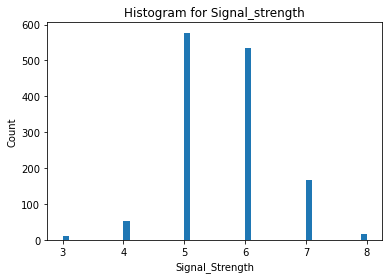

In [24]:
#Histogram for the target variable "Signal Strength"
target_variable = df['Signal_Strength']
plt.hist(target_variable, bins=50)
plt.xlabel('Signal_Strength')
plt.ylabel('Count')
plt.title("Histogram for Signal_strength")
plt.show()

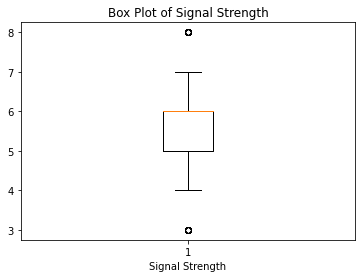

In [25]:
#Boxplot for target variable
plt.boxplot(target_variable)
plt.xlabel('Signal Strength')
plt.title('Box Plot of Signal Strength')
plt.show()

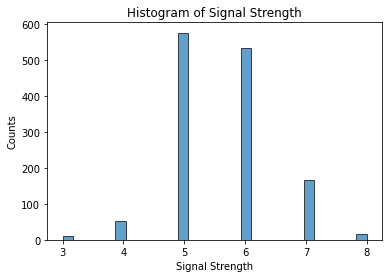

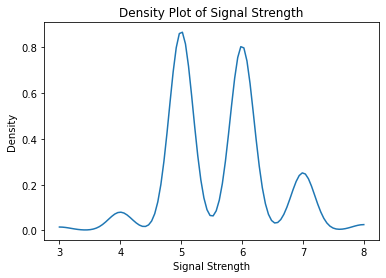

In [27]:
#Histogram for the target variable "Signal Strength"
bins = np.linspace(min(target_variable), max(target_variable), 30)
plt.hist(target_variable, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Signal Strength')
plt.ylabel('Counts')
plt.title('Histogram of Signal Strength')
plt.show()

# Density Plot for the target variable "Signal Strength"
density = stats.gaussian_kde(target_variable)
x = np.linspace(min(target_variable), max(target_variable), 100)
plt.plot(x, density(x))
plt.xlabel('Signal Strength')
plt.ylabel('Density')
plt.title('Density Plot of Signal Strength')
plt.show()

In [28]:
target_variable.describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: Signal_Strength, dtype: float64

In [29]:
from scipy.stats import skew

# Assuming the data has been stored in a variable named 'data'

# Calculating the skewness
skewness = skew(target_variable)

# Checking whether the data is skewed
if skewness > 0:
    print("The data distribution is positively skewed.")
elif skewness < 0:
    print("The data distribution is negatively skewed.")
else:
    print("The data distribution is not skewed.")

The data distribution is positively skewed.


###### Part 1.1 e- - Share insights from the initial data banalysis (at least 2). 

###### Insights:
             1. The target variable, Signal_Strength is a classification variable. All of them are positively skewed.
             2. The value 5 has the highest frequency while the value 3 has the lowest.
             3. Signal_Strength has a maximum value of 8 and a minimum value of 3.

###### Part 1.2 a - Split the data into X & Y

In [30]:
# Spliting the data into X and Y
X = df.drop('Signal_Strength', axis=1)
Y = df['Signal_Strength']

###### Part 1.2 b - Split the data into train & test with 70:30 proportion.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

###### Part 1.2 c - Print shape of all the 4 variables an verify if train and test data is in sync.

In [33]:
# Verifying if train and test data is in sync
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (951, 11)
X_test shape: (408, 11)
Y_train shape: (951,)
Y_test shape: (408,)


In [34]:
if X_train.shape[0] == Y_train.shape[0] and X_test.shape[0] == Y_test.shape[0]:
    print("Training and test data is in sync.")
else:
    print("Training and test data is not in sync.")

Training and test data is in sync.


###### Part 1.2 d - Normalise the train and test data with appropriate method.

In [35]:
# Normalizing the train and test data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[0.83185841, 0.17605634, 0.80769231, ..., 0.14423077, 0.29090909,
        0.36923077],
       [0.40707965, 0.21126761, 0.29487179, ..., 0.27884615, 0.10909091,
        0.15384615],
       [0.69911504, 0.21126761, 0.80769231, ..., 0.125     , 0.32727273,
        0.27692308],
       ...,
       [0.19469027, 0.21830986, 0.1025641 , ..., 0.42307692, 0.19393939,
        0.18461538],
       [0.38053097, 0.11267606, 0.3974359 , ..., 0.29807692, 0.13333333,
        0.30769231],
       [0.39823009, 0.12676056, 0.53846154, ..., 0.30769231, 0.13333333,
        0.46153846]])

In [38]:
X_test

array([[0.27433628, 0.32394366, 0.05128205, ..., 0.46153846, 0.12121212,
        0.16923077],
       [0.31858407, 0.33450704, 0.12820513, ..., 0.41346154, 0.25454545,
        0.38461538],
       [0.33628319, 0.14788732, 0.55128205, ..., 0.29807692, 0.29090909,
        0.43076923],
       ...,
       [0.38053097, 0.3028169 , 0.5       , ..., 0.49038462, 0.15151515,
        0.29230769],
       [0.46902655, 0.11267606, 0.71794872, ..., 0.27884615, 0.24242424,
        0.46153846],
       [0.48672566, 0.1056338 , 0.44871795, ..., 0.36538462, 0.3030303 ,
        0.43076923]])

###### Part 1.2 e - Transform Labels into format acceptable by Neural Network 

In [39]:
# number of classes
num_classes = 11

# one hot encode y_train
Y_train = to_categorical(Y_train, num_classes)

# one hot encode y_test
Y_test = to_categorical(Y_test, num_classes)

###### Part 1.3 a - Design a Neural Network to train a classifier. 

In [40]:
# Designing a Neural Network to train a classifier
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

###### Part 1.3 b - Train the classifier using previously designed Architecture

In [41]:
# Training the classifier
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 2s 13ms/step - loss: 2.0520 - accuracy: 0.4111 - val_loss: 1.5104 - val_accuracy: 0.5417
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.3203 - accuracy: 0.4742 - val_loss: 1.2102 - val_accuracy: 0.5172
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 1.2040 - accuracy: 0.5037 - val_loss: 1.1453 - val_accuracy: 0.5735
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.1288 - accuracy: 0.5531 - val_loss: 1.0895 - val_accuracy: 0.5613
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 1.0758 - accuracy: 0.5594 - val_loss: 1.0422 - val_accuracy: 0.5833
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0545 - accuracy: 0.5636 - val_loss: 1.0138 - val_accuracy: 0.5907
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 1.0453 - accuracy: 0.5668 - val_loss: 1.0053 - val_accuracy: 0.5980
Epoch 8/100


###### Part 1.3 c - Plot 2 separate visuals.
    i) Training Loss and Validation Loss
    ii) Training Accuracy and Validation Accuracy

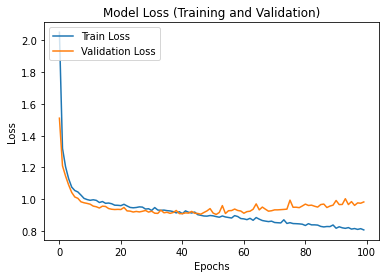

In [42]:
#i. Plotting Training Loss and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Training and Validation)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

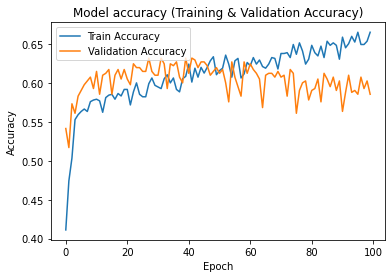

In [43]:
#ii. Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy (Training & Validation Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

###### Part 1.3 d - Design new architecture/update existing architecture in attempt to improve the performance of the mode

In [44]:
# Initializing the new model
model2 = Sequential()

# Adding layers to the new model
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

# Compiling the new model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Training the new model
history2 = model2.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
15/15 [==============================] - 1s 22ms/step - loss: 2.3059 - accuracy: 0.1262 - val_loss: 2.1927 - val_accuracy: 0.3922
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 2.0990 - accuracy: 0.3207 - val_loss: 1.9145 - val_accuracy: 0.4020
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 1.8526 - accuracy: 0.3712 - val_loss: 1.6189 - val_accuracy: 0.4020
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.6417 - accuracy: 0.4101 - val_loss: 1.4282 - val_accuracy: 0.3775
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 1.5132 - accuracy: 0.3943 - val_loss: 1.3444 - val_accuracy: 0.4216
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4617 - accuracy: 0.4280 - val_loss: 1.3025 - val_accuracy: 0.4216
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3908 - accuracy: 0.4059 - val_loss: 1.2659 - val_accuracy: 0.4216
Epoch 8/100


###### Part 1.3 e - Plot visuals as in Q3.C and share insights about difference observed in both the models

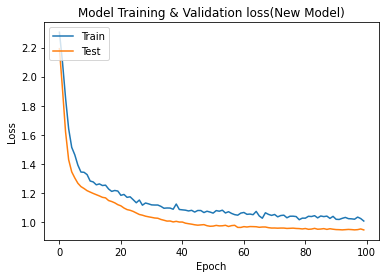

In [46]:
# Plot training & validation loss values for the new model
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Training & Validation loss(New Model)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

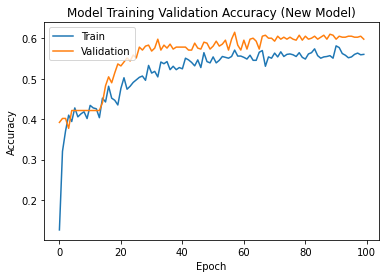

In [47]:
# Plot the training accuracy and validation accuracy for the new model
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Training Validation Accuracy (New Model)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

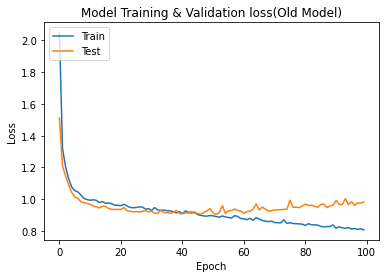

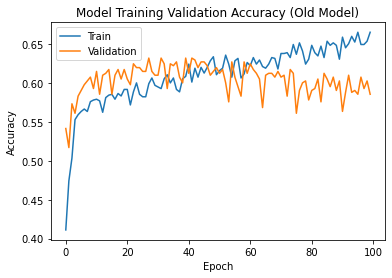

In [48]:
# Plot training & validation loss values for the Old model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Training & Validation loss(Old Model)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot the training accuracy and validation accuracy for the Old model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Training Validation Accuracy (Old Model)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

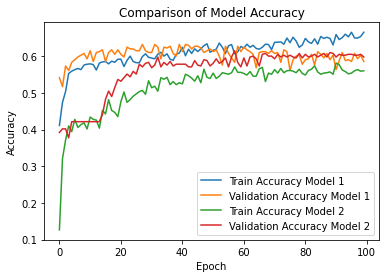

In [49]:
#Comparing both Models through Visualisations
# Plot the training accuracy and validation accuracy for the first model
plt.plot(history.history['accuracy'], label='Train Accuracy Model 1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy Model 1')

# Plot the training accuracy and validation accuracy for the second model
plt.plot(history2.history['accuracy'], label='Train Accuracy Model 2')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy Model 2')

# Add a title and labels to the plot
plt.title('Comparison of Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()

### Insights
###### Overfitting:
    Model 1: Initially, the training and validation accuracy for model 1 differ significantly. However, after repeated           epochs, the training accuracy and validation accuracy both increase and become equal until the iteration of                     several epochs. This indicates that the data is not overfitting, which means that it is learning the training                   data well enough to generalize to new, previously unseen data.
    Model 2: Model 2's training and validation are even and parallel throughout the epoch iterations. This implies that         adding some layers to the train data improves efficiency.
###### Underfitting:
    Model 1: Both the training and validation accuracy are high, indicating that the model is not underfitting and is     adequately capturing the underlying pattern in the data.
    Model 2: After adding layers to the data, both the training and validation accuracy are high, indicating that the model     is not underfitting, implying that it captures the underlying pattern in the data well enough.
###### Model Complexion:
    When we examine the plots that distinguish the two models, we can see that model 2 has a higher train and                validation accuracy than model 1. This implies that the more accurate model (Model 2) is a better fit for the                    data and has a more appropriate level of complexity for the task.
###### Convergence:
    At epoch 100 of model 2, we can see that the model's training and validation accuracy have both converged at 100. This      indicates that the model's performance is no longer improving.
     

In [50]:
del df
del model
del model2

### Part B: Project Objective is to build a digit classifier on the SVHN (Street View Housing Number) dataset

###### Part 2.1 a - Read the .h5 file and assign to avariable

In [51]:
import h5py
d1 = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

###### Part 2.1 b - Print all the keys from the .h5 file.

In [52]:
d1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

###### Part 2.1 c - Split the data into X_train, X_test, Y_train, Y_test 

In [53]:
X_train = d1['X_train'][:]
y_train = d1['y_train'][:]

X_val = d1['X_val'][:]
y_val = d1['y_val'][:]

X_test = d1['X_test'][:]
y_test = d1['y_test'][:]

###### Part 2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [55]:
# Printin the shapes of the data splits
print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of x_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of x_test: (18000, 32, 32)
Shape of y_test: (18000,)
Shape of x_val: (60000, 32, 32)
Shape of y_val: (60000,)


###### Part 2.2 b - Visualise first 10 images in train data and print its corresponding labels

The corresponding label for the below image  : 2
The corresponding label for the below image  : 6
The corresponding label for the below image  : 7
The corresponding label for the below image  : 4
The corresponding label for the below image  : 4
The corresponding label for the below image  : 0
The corresponding label for the below image  : 3
The corresponding label for the below image  : 0
The corresponding label for the below image  : 7
The corresponding label for the below image  : 3


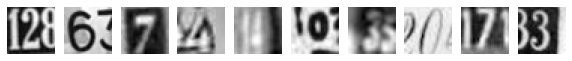

In [57]:
%matplotlib inline

# Plotting the first 10 images in the training data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('The corresponding label for the below image  : %s' % ((y_train[i])))
plt.show()

###### Part 2.2 c - Reshape all the images with appropriate shape update the data in same variable.


In [58]:
# Reshaping The 2D data- 32*32 into 1D - 1024
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'After reshaping,The Shape of X_train is {X_train.shape}')
print(f'After reshaping,The Shape of X_val is {X_val.shape}')
print(f'After reshaping,The Shape of X_test is {X_test.shape}')

After reshaping,The Shape of X_train is (42000, 1024)
After reshaping,The Shape of X_val is (60000, 1024)
After reshaping,The Shape of X_test is (18000, 1024)


###### Part 2.2 d - Normalise the images i.e. Normalise the pixel values. 

In [59]:
#Checking the min and max value of train data before normalization
print('Before Normalization')
print(f'The Min value of X_train is {X_train.min()}')
print(f'Max value of X_train is {X_train.max()}\n')
#Performing Normalisation
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

Before Normalization
The Min value of X_train is 0.0
Max value of X_train is 254.97450256347656



In [60]:
#Checking the min and max value of train data after normalization
print('After Normalization: ')
print(f'The Min value of X_train is  {X_train.min()}')
print(f'The Max value of X_train is {X_train.max()}')

After Normalization: 
The Min value of X_train is  0.0
The Max value of X_train is 1.0


###### Part 2.2 e - Transform Labels into format acceptable by Neural Network 

In [61]:
#Before One Hot Encoding
print(f'The sample value of y_train before one hot encode is:  {y_train[0]}\n')

The sample value of y_train before one hot encode is:  2



In [62]:
#Performimg One-Hot encoding
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)
#After performing One Hot Encoding
print(f'The Sample value of Y_train after one hot encode is: {y_train[0]}')

The Sample value of Y_train after one hot encode is: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


The Label for the image at index 1 is:  2
The Label for the image at index 2 is:  6
The Label for the image at index 3 is:  7
The Label for the image at index 4 is:  4
The Label for the image at index 5 is:  4
The Label for the image at index 6 is:  0
The Label for the image at index 7 is:  3
The Label for the image at index 8 is:  0
The Label for the image at index 9 is:  7
The Label for the image at index 10 is:  3
The Label for the image at index 11 is:  1
The Label for the image at index 12 is:  0
The Label for the image at index 13 is:  1
The Label for the image at index 14 is:  3
The Label for the image at index 15 is:  1
The Label for the image at index 16 is:  1
The Label for the image at index 17 is:  0
The Label for the image at index 18 is:  0
The Label for the image at index 19 is:  8
The Label for the image at index 20 is:  4


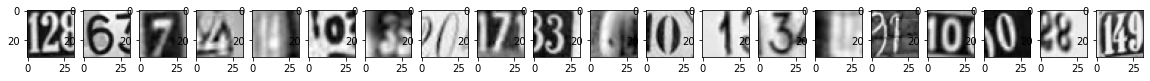

In [63]:
#Printing first 20 images with their labels
plt.figure(figsize=(20,1))
for i in range(20):
    plt.subplot(1,20,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'The Label for the image at index {i+1} is:  {np.argmax(y_train[0:20][i])}')

###### Part 2.2 f - Print total Number of classes in the Dataset.

In [65]:
# Get the number of unique classes in the labels
num_classes = len(np.unique(d1))

# Printing the number of classes
print("The Total number of classes in the dataset is:", num_classes)

The Total number of classes in the dataset is: 6


###### Part 2.3 a - Design a Neural Network to train a classifier. 

In [66]:
# Designing the Neural Network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###### Part 2.3 b - Train the classifier using previously designed Architecture (Use best suitable parameters). 

In [67]:
# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3461 - accuracy: 0.1117 - val_loss: 0.3288 - val_accuracy: 0.1294
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3162 - accuracy: 0.1715 - val_loss: 0.2954 - val_accuracy: 0.2698
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2755 - accuracy: 0.3542 - val_loss: 0.2654 - val_accuracy: 0.3940
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2466 - accuracy: 0.4553 - val_loss: 0.2369 - val_accuracy: 0.4823
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2329 - accuracy: 0.4970 - val_loss: 0.2316 - val_accuracy: 0.4983
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2236 - accuracy: 0.5262 - val_loss: 0.2174 - val_accuracy: 0.5436
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2178 - accuracy: 0.5435 - val_loss: 0.2168 - val_ac

###### Part 2.3 c - Evaluate performance of the model with appropriate metrics.

In [68]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("The Model Loss is : {:.2%}".format(test_loss))
print("The Model Accuracy is : {:.2%}".format(test_acc))

The Model Loss is : 17.73%
The Model Accuracy is : 66.26%


###### Part 2.3 d - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

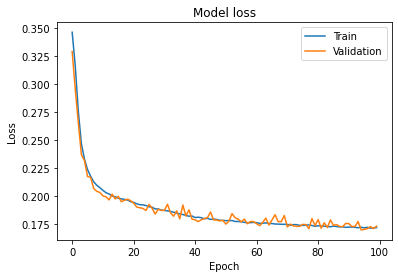

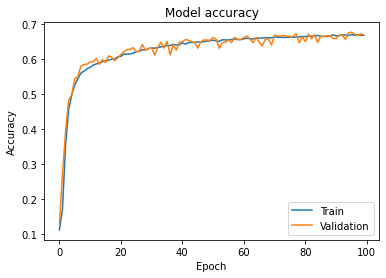

In [69]:
import matplotlib.pyplot as plt

# Plot training & validation loss values vs no. of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values vs no. of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Insights
###### We can see the following from the plots:
    Training Loss: From the "Model Loss" graph, it can be seen that the training loss is decreasing with the increasing number of epochs, then it means that the model is learning from the data and reducing the error. Therefore, we can also conclude that the data in the model is not overfitted.
    Validation Loss: The "Model Loss" graph shows that the validation loss is close to the training loss, indicating that the model is generalising well to unseen data as the number of epochs increases.
    Tarining Accuracy: The "Model Accuracy" graph shows that the training accuracy increases with the number of epochs, indicating that the model is learning from the data and improving its performance.
    Validation Accuracy: The "Model Accuracy" graph shows that the validation accuracy is close to the training accuracy, indicating that the model is generalising well to new data.
    
    
  